# Linear Regression

The goal of this assignment is to build a linear regression model.

In [3]:
%matplotlib inline

#imports
import numpy as np
import matplotlib.pyplot as plt

#### Import the training set and plot a figure
Load a training set ('training.csv') with two attributes: (1) the amount of hours studied and (2) the test scores. The first column is a feature attribute and the second column is the target attribute.
Then, plot a figure. X-axis is the amout of hours studied and Y-axis is the test scores.

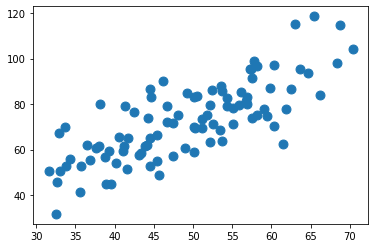

In [13]:
# Your code starts here 
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#1. load the training data

instances = np.genfromtxt('training.csv', delimiter=',')

#2. draw a scatter plot


hoursstudied = instances[:,0]
testscores = instances[:,1]

plt.scatter(hoursstudied, testscores, s=80)
plt.show()



#### the following hyperparameters are given (no change is required)

In [14]:
#hyperparamters
learning_rate = 0.0001 #this is alpha in my slide 
initial_b = 0 #this is initial theta_0 
initial_w = 0 #this is initial theta_1
num_iterations = 20 #the number of iterations to adjust

#### Define cost function

In [27]:
#input: b, w, and loaded traning set (i.e., instances)
#output: return the average of squared error (i.e., cost / (2 * number of instances) as we showed in class)
def compute_cost(b, w, instances):  
    # Your code starts here
    #   Please add comments or text cells in between to explain the general idea of each block of the code.
    #   Please feel free to add more cells below this cell if necessary
    cost = 0
    n = len(instances)
    
    for instance in instances:
        
        h_x = b+(w*instance[0])
        y = instance[1]
        
        cost = (h_x-y) ** 2
        
    
    
    return cost/(2*n)


#### Define Gradient Descent function to update parameter values (w, b) by their gradients (no change is required)

In [28]:
#input: current b, current w, instances, learning_rate
#output: return updated b and w
def step_gradient(b_current, w_current, instances, learning_rate):
    w_gradient = 0
    b_gradient = 0
    N = float(len(instances))

    #Calculate Gradient
    for i in range(0, len(instances)):
        x = instances[i, 0]
        y = instances[i, 1]
        w_gradient += (1/N) * x * ((w_current*x + b_current) - y)
        b_gradient += (1/N) * 1 * ((w_current*x + b_current) - y)
    
    #Update current w and b
    w_updated = w_current - learning_rate * w_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, w_updated


#### Define Gradient Descent Runner function
In this function, you will run step_gradient function for the number of iterations to gradually reduce cost in each iteration. In addition, in each iteration, compute current cost (i.e., error rate) and store the current cost into a list (cost_list).

In [29]:
#input: instance, current b, current w, learning rate, and number of iterations
#output: return final b, final w and costs (i.e., a list storing cost in each iteration)

def gradient_descent_runner(instances, current_b, current_w, learning_rate, num_iterations):
    b = current_b
    w = current_w
    cost_list = [] #store cost in each iteration
    
    # Your code starts here
    #   Please add comments or text cells in between to explain the general idea of each block of the code.
    #   Please feel free to add more cells below this cell if necessary
    for iteration in range(num_iterations):
        cost = compute_cost(b, w, instances)
        cost_list.append(cost)
        b, w = step_gradient(b, w, instances, learning_rate)
        
            
    return [b, w, cost_list]

#### Run gradient_descent_runner() to get optimized parameters b and w (no change is required)

In [30]:
b, w, cost_list = gradient_descent_runner(instances, initial_b, initial_w, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized w:', w)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, w, instances))

Optimized b: 0.029234361875224105
Optimized w: 1.4699367981889162
Minimized cost: 0.033810385286253936


#### Plot a figure to show how cost (i.e., average cost) has been changed during the iterations
X-axis is each iteration
Y-axis is cost in the iteration

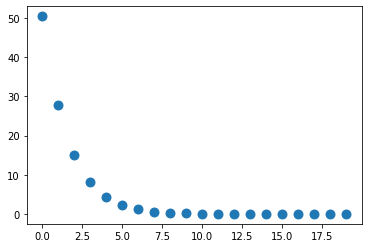

In [31]:
# Your code starts here 
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
#hint: use cost_list

y = cost_list
x = list(range(len(cost_list)))

plt.scatter(x, y, s=80)
plt.show()





#### Plot a line of best fit with instances
Plot a scatter plot of the training set with a line of the best fit (i.e., your linear regression model/function)

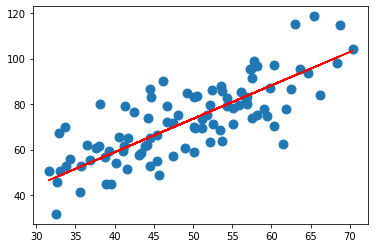

In [36]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

plt.scatter(hoursstudied, testscores, s=80)
plt.plot(hoursstudied, b + w * hoursstudied, '-',c='red')
plt.show()





#### Import the test  set and predict each student's test score

Load the test set and predict each instance's test score by using your regression model
and then print out the predicted results in a table
Although the current test.csv contains the ground truth (i.e., each student's "true" test score), we assume we don't know it and want to predict it given each student's hours of study

In [54]:
# Your code starts here 
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

test_instances = np.genfromtxt('test.csv', delimiter=',')
test_hoursstudied = test_instances[:,0]
pred_testscores =   b + w * test_hoursstudied
true_testscores = test_instances[:,1]



import pandas as pd

# print as a table
df = pd.DataFrame(np.asarray([test_hoursstudied,pred_testscores,true_testscores]).T, columns=["Hours Studied","Predicted Score", "Actual Score"]) 

print(df)


   Hours Studied  Predicted Score  Actual Score
0      50.030174        73.570429     81.536991
1      49.239765        72.408577     72.111832
2      50.039576        73.584248     85.232007
3      48.149859        70.806484     66.224958
4      25.128485        36.966519     53.454394


#### [optional for fun] 
1. scikit-learn has linear regression implementation. Use its implementation to predict the students' test scores in the test set. Refer to https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
2. you may implement your linear regression by using Vectorization

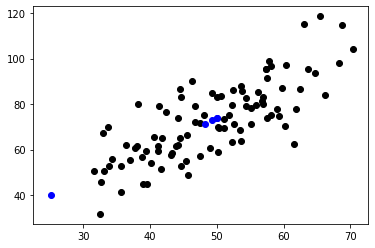

In [60]:
# Your code starts here (again they are optional)
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

from sklearn import linear_model


regr = linear_model.LinearRegression()

hoursstudied=hoursstudied.reshape(-1, 1)
testscores=testscores.reshape(-1, 1)


# hoursstudied = instances[:,0]
# testscores = instances[:,1]

# Train the model using the training sets
regr.fit(hoursstudied, testscores)

test_hoursstudied=test_hoursstudied.reshape(-1, 1)

# Make predictions using the testing set
pred_testscores = regr.predict(test_hoursstudied)

# Plot outputs
plt.scatter(hoursstudied, testscores,  color='black')
plt.scatter(test_hoursstudied, pred_testscores, color='blue')

plt.show()




*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

** How to submit: **

        Please submit through Canvas, in the Assignment "HW2".